<div style="
    font-family: cerilleta;
    font-size: 50px;
    font-weight: bold;
    font-style: italic;
    color: #00CED1;
    text-align: center;
    padding: 20px;
    border-radius: 10px;
">
    Students' Social Media Addiction
</div>

<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Introduction :</u></b></li>
</ul>

  Social media plays a significant role in students' daily lives, often influencing their mental well-being, sleep patterns, and academic performance. This project uses Python tools to analyze student behavior, time spent online, and its correlation with health metrics. By using data visualization and statistical analysis, we aim to uncover patterns that highlight the potential impact of excessive social media usage.


<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Import Required Libraries :</u></b></li>
</ul>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# For better visualization in the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Loading the Dataset :</u></b></li>
</ul>

In [11]:
df = pd.read_csv("C:/Users/DELL/Downloads/Students Social Media Addiction.csv")

In [12]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Shape of the Dataset :</u></b></li>
</ul>

In [10]:
df.shape

(705, 13)

### Observation :
* There are total **13 Attributes/columns** available in the dataset.
* There are total **705 Records/Rows** available in the dataset.

<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Copy the Dataset :</u></b></li>
</ul>

In [15]:
df1 = df.copy()

<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Students' Social Media Addiction Dataset Description :</u></b></li>
</ul>

This CSV file contains survey responses from students aged 16–25 across multiple countries, capturing their social media usage patterns alongside key personal, academic, and well-being indicators. It is structured for easy import into statistical software or data-science environments and includes both quantitative and categorical fields to enable exploratory analysis, predictive modeling, and reporting on the relationships between social media addiction and various life outcomes.

* Student_ID:
  A unique integer identifier assigned to each survey respondent to enable de-duplication and track individual records without revealing personal information.
* Age:
The student’s age in completed years at the time of the survey, used to segment analysis by age group and control for developmental differences.
* Gender:
The student’s self-reported gender, recorded as “Male” or “Female” to allow for demographic breakdowns in usage and outcome measures.
* Academic_Level:
The highest level of education the respondent is currently enrolled in, with categories: “High School,” “Undergraduate,” or “Graduate,” facilitating stratified analyses by academic stage.
* Country:
The country of residence where the student completed the survey, enabling cross-country comparisons of social media behaviors and impacts.
* Avg_Daily_Usage_Hours:
The average number of hours per day the student spends on social media platforms, calculated from self-reported weekday and weekend usage estimates
* Most_Used_Platform:
The social media platform on which the student spends the most time (e.g., Instagram, Facebook, TikTok), used to examine platform-specific effects.
* Affects_Academic_Performance:
A binary indicator (“Yes”/“No”) reflecting whether the student perceives their social media use as having a negative impact on their academic performance.
* Sleep_Hours_Per_Night:
The respondent’s average nightly sleep duration in hours, provided to investigate correlations between screen time and sleep quality/quantity.
* Mental_Health_Score:
A self-rated integer from 1 (poor) to 10 (excellent) indicating overall mental well-being, allowing assessment of potential associations with social media habits.
* Relationship_Status:
The student’s current romantic relationship status, categorized as “Single,” “In Relationship,” or “Complicated,” to explore social media’s impact on interpersonal dynamics.
* Conflicts_Over_Social_Media:
The number of arguments or disagreements the student reports having had with family, friends, or partners due to their social media use, serving as a proxy for social friction.
* Addicted_Score:
A composite score from 1 (low addiction) to 10 (high addiction) based on a standardized survey scale (e.g., Bergen Social Media Addiction Scale), quantifying the degree of problematic usage.







<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Data Overview and Summary Statistics :</u></b></li>
</ul>

In [16]:
# Dataset information
print("\nDataset information:")
df1.info()

# Summary statistics
print("\nSummary statistics of numerical variables:")
df1.describe()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Data Pre-processing and Feature Engineering :</u></b></li>
</ul>

### 1) Checking missing values of each columns:

In [19]:
df1.isnull().sum().to_frame().rename(columns={0:"Missing values count"})

,Missing values count
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


### 2) Convert categorical variables to appropriate data types if needed:
### 3) Check unique values in categorical columns:

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df1[col].value_counts())


Unique values in Gender:
Gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in Academic_Level:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in Country:
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

Unique values in Most_Used_Platform:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

Unique values in Affects_Academic_Performance:
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in Relationship_Status:
Relationship_Status
Single             384
In Relationship    289
Complica

<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Create additional features for analysis :</u></b></li>
</ul>

### 1) Create age groups:

In [21]:
bins = [15, 20, 25, 30, 35]
labels = ['16-20', '21-25', '26-30', '31-35']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)

### 2) Categorize social media usage hours:

In [24]:
usage_bins = [0, 2, 4, 6, 12, 24]
usage_labels = ['Minimal (0-2h)', 'Moderate (2-4h)', 'High (4-6h)', 'Very High (6-12h)', 'Extreme (12h+)']
df1['Usage_Category'] = pd.cut(df1['Avg_Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels)

### 3) Categorize sleep hours:

In [26]:
sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = ['Poor (<5h)', 'Fair (5-7h)', 'Good (7-9h)', 'Excellent (9h+)']
df1['Sleep_Category'] = pd.cut(df1['Sleep_Hours_Per_Night'], bins=sleep_bins, labels=sleep_labels)

In [71]:
platform_pref = df1.groupby('Country')['Most_Used_Platform'].value_counts().sort_values(ascending=False)
print(platform_pref)

Country      Most_Used_Platform
India        WhatsApp              25
France       Instagram             22
Switzerland  Instagram             20
USA          Instagram             19
Denmark      Facebook              19
                                   ..
India        Twitter                1
Iceland      Instagram              1
Hungary      TikTok                 1
Hong Kong    Instagram              1
Yemen        Facebook               1
Name: count, Length: 171, dtype: int64


<ul style="list-style-type: '➤ '; font-family: 'Times New Roman'; font-size: 25px; color: pink">
  <li><b><u> Exploratory Data Analysis (EDA) :</u></b></li>
</ul>

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: purple">
  <li><b><u> 1. Student Demographics :</u></b></li>
</ul>

### Age and Gender Distribution-

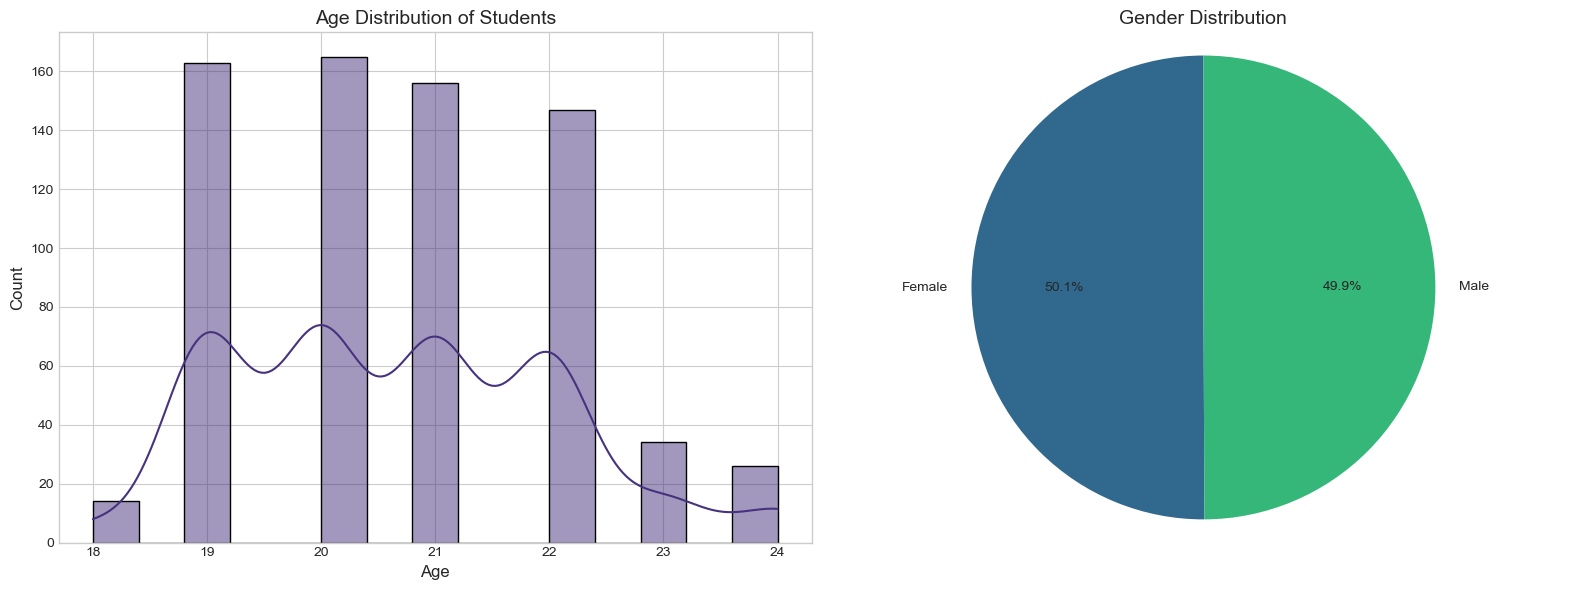

In [30]:
plt.figure(figsize=(16, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df1['Age'], kde=True, bins=15)
plt.title('Age Distribution of Students', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Gender distribution
plt.subplot(1, 2, 2)
gender_counts = df1['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()

### Country and Academic Level Distribution-

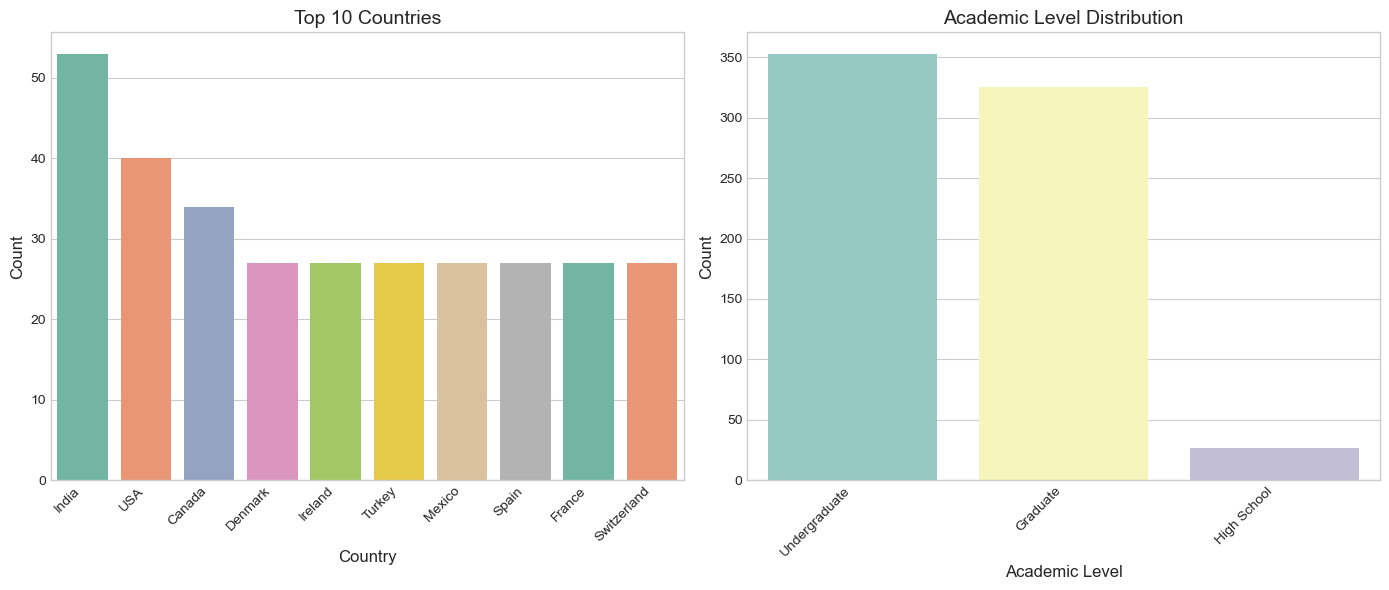

In [32]:
plt.figure(figsize=(14, 6))

# === Country distribution ===
plt.subplot(1, 2, 1)
country_counts = df1['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    palette=sns.color_palette("Set2", n_colors=10)
)
plt.title('Top 10 Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# === Academic level distribution ===
plt.subplot(1, 2, 2)
academic_counts = df1['Academic_Level'].value_counts()
sns.barplot(
    x=academic_counts.index,
    y=academic_counts.values,
    palette=sns.color_palette("Set3", n_colors=len(academic_counts))
)
plt.title('Academic Level Distribution', fontsize=14)
plt.xlabel('Academic Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: purple">
  <li><b><u> 2. Social Media Usage Patterns :</u></b></li>
</ul>

### Average Daily Usage Hours-

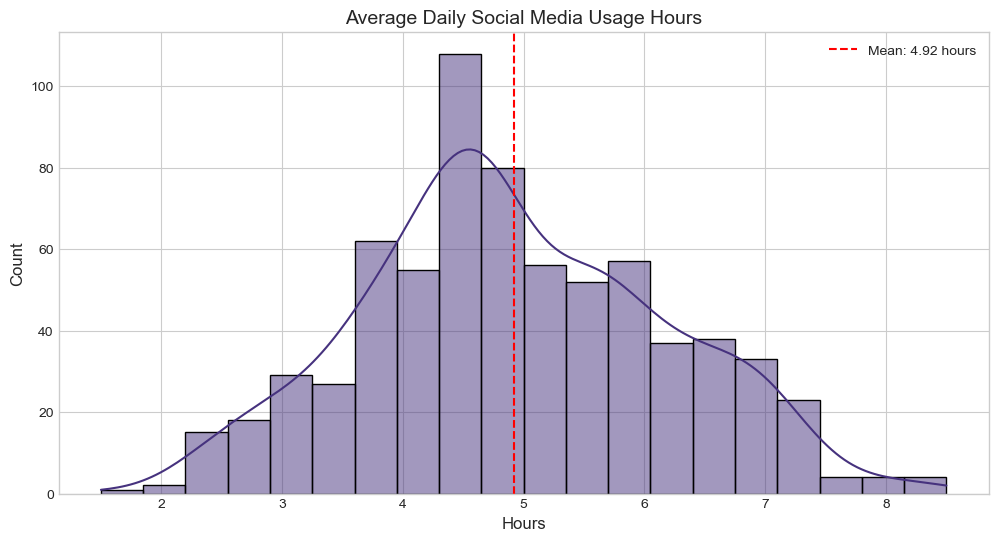

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(df1['Avg_Daily_Usage_Hours'], kde=True, bins=20)
plt.title('Average Daily Social Media Usage Hours', fontsize=14)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(df1['Avg_Daily_Usage_Hours'].mean(), color='red', linestyle='--', label=f'Mean: {df1["Avg_Daily_Usage_Hours"].mean():.2f} hours')
plt.legend()
plt.show()

In [63]:
X = df1['Avg_Daily_Usage_Hours'].mean()
print(f"Average daily social media usage among students is {X:.2f} hours")

Average daily social media usage among students is 4.92 hours


### Most used platforms-

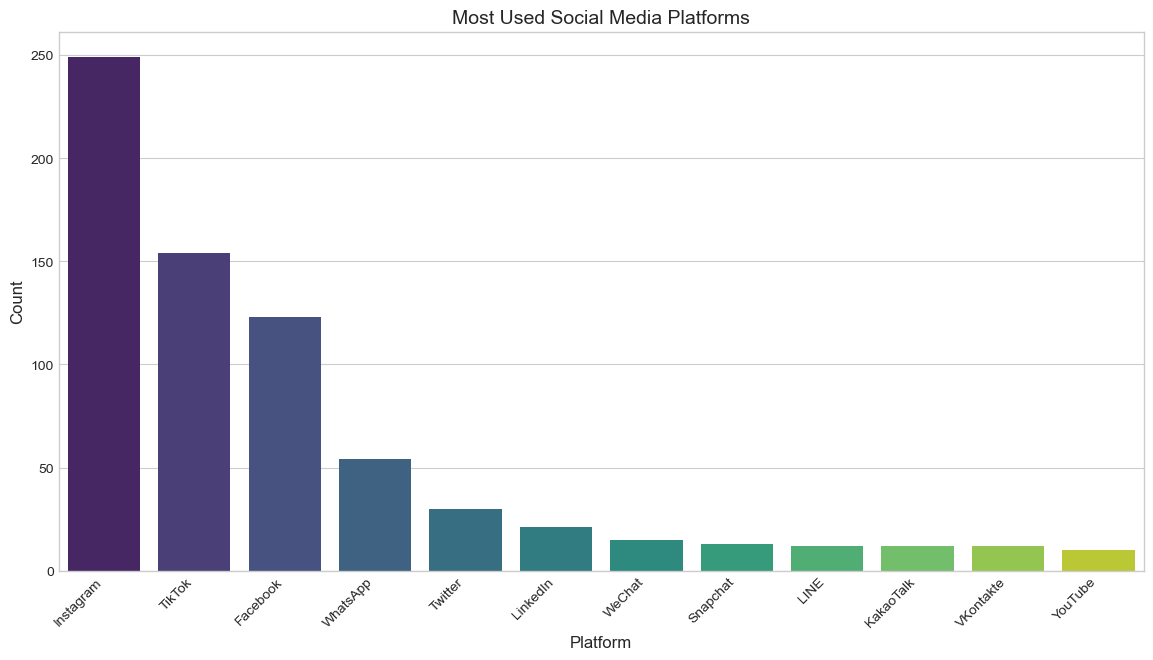

In [34]:
plt.figure(figsize=(14, 7))
platform_counts = df1['Most_Used_Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Most Used Social Media Platforms', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### Social Media Usage by Age Group-

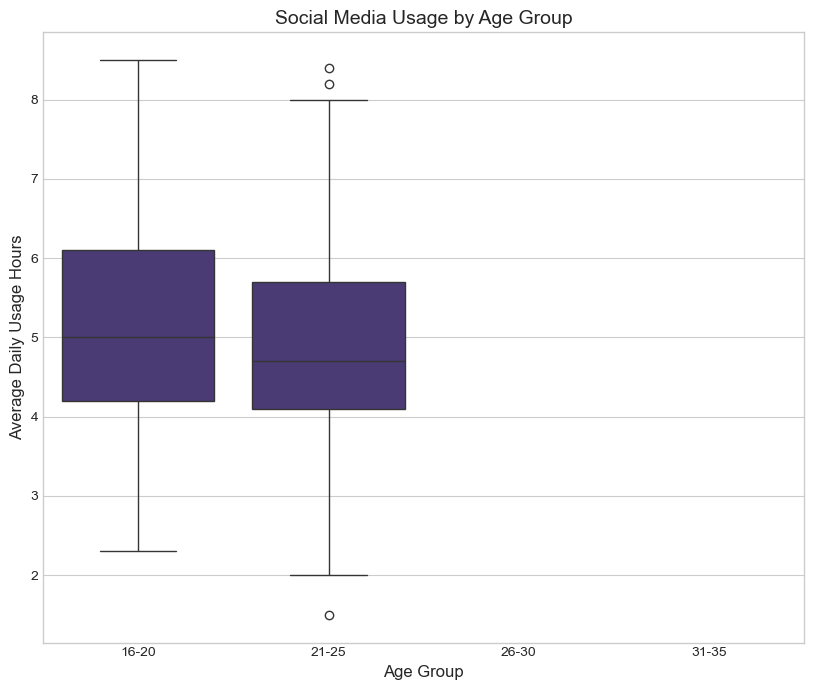

In [38]:
plt.figure(figsize=(16, 7))

# Usage by age group
plt.subplot(1, 2, 1)
sns.boxplot(x='Age_Group', y='Avg_Daily_Usage_Hours', data=df1)
plt.title('Social Media Usage by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)


plt.tight_layout()
plt.show()

### Social Media usage by gender-

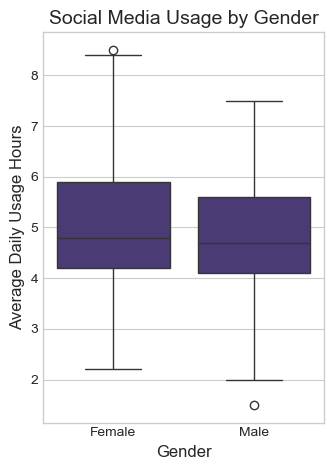

In [37]:
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', data=df1)
plt.title('Social Media Usage by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)

plt.tight_layout()
plt.show()

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: purple">
  <li><b><u> 3. Academic Impact Analysis :</u></b></li>
</ul>

### Academic Performance vs Social Media Usage-

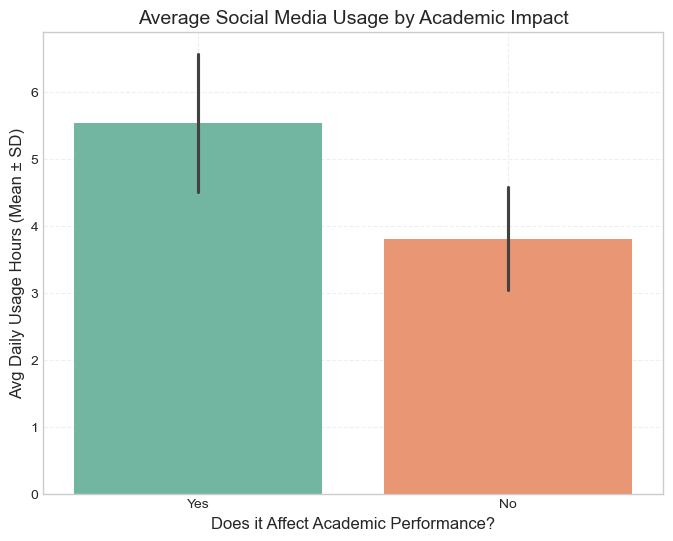

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df1,
    x='Affects_Academic_Performance',
    y='Avg_Daily_Usage_Hours',
    estimator='mean',
    ci='sd',  # shows standard deviation bars
    palette='Set2'
)
plt.title('Average Social Media Usage by Academic Impact', fontsize=14)
plt.xlabel('Does it Affect Academic Performance?', fontsize=12)
plt.ylabel('Avg Daily Usage Hours (Mean ± SD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Academic Level vs Addiction Score-

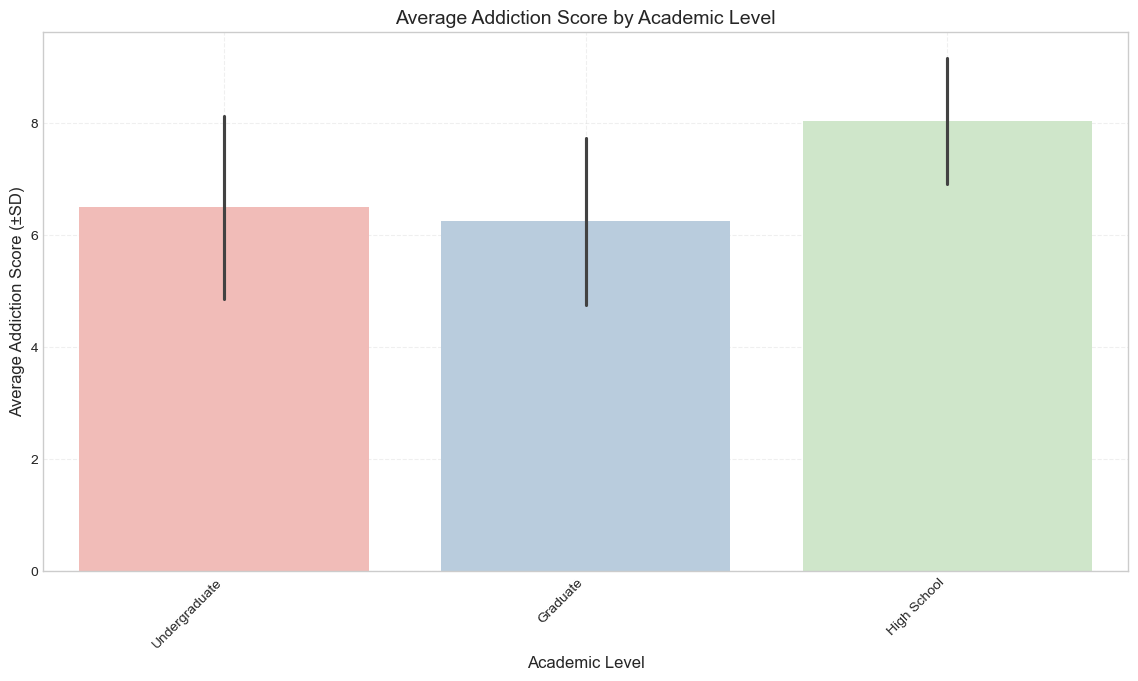

In [42]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Academic_Level', y='Addicted_Score', data=df1, ci='sd', palette='Pastel1')
plt.title('Average Addiction Score by Academic Level', fontsize=14)
plt.xlabel('Academic Level', fontsize=12)
plt.ylabel('Average Addiction Score (±SD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Usage Category vs Academic Performance-
### Cross-tabulation of usage category and academic impact-

<Figure size 1400x700 with 0 Axes>

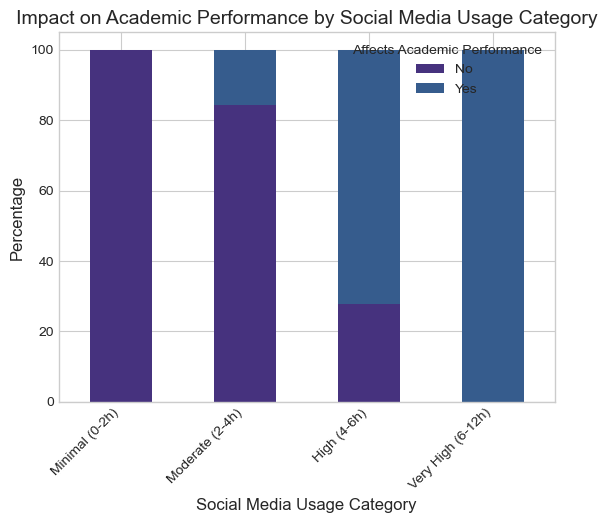

In [44]:
academic_impact_by_usage = pd.crosstab(df1['Usage_Category'], df1['Affects_Academic_Performance'])
academic_impact_by_usage_percentage = academic_impact_by_usage.div(academic_impact_by_usage.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
academic_impact_by_usage_percentage.plot(kind='bar', stacked=True)
plt.title('Impact on Academic Performance by Social Media Usage Category', fontsize=14)
plt.xlabel('Social Media Usage Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Affects Academic Performance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
print(df1['Affects_Academic_Performance'].value_counts())

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


In [59]:
total = len(df1)
affected = df1[df1['Affects_Academic_Performance'] == 'Yes'].shape[0]
X = (affected / total) * 100

print(f"{X:.2f}% of students believe social media negatively impacts their academic performance.")


64.26% of students believe social media negatively impacts their academic performance.


<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: purple">
  <li><b><u> 4. Mental Health and Sleep Analysis :</u></b></li>
</ul>

### Mental Health Score vs Social Media Usage-

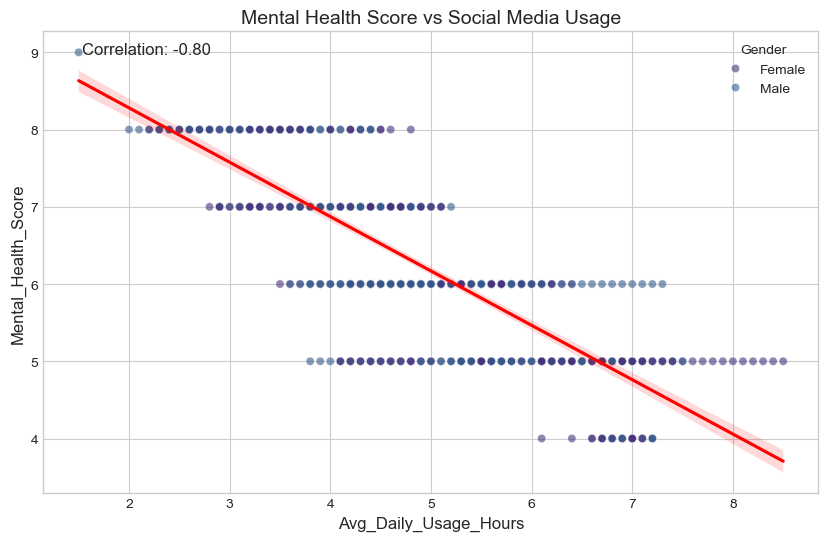

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df1, alpha=0.6, hue='Gender')
plt.title('Mental Health Score vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Mental Health Score (0-10)', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df1, scatter=False, color='red')

# Calculate correlation
correlation = df1['Avg_Daily_Usage_Hours'].corr(df1['Mental_Health_Score'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

### Sleep Hours vs Social Media Usage-

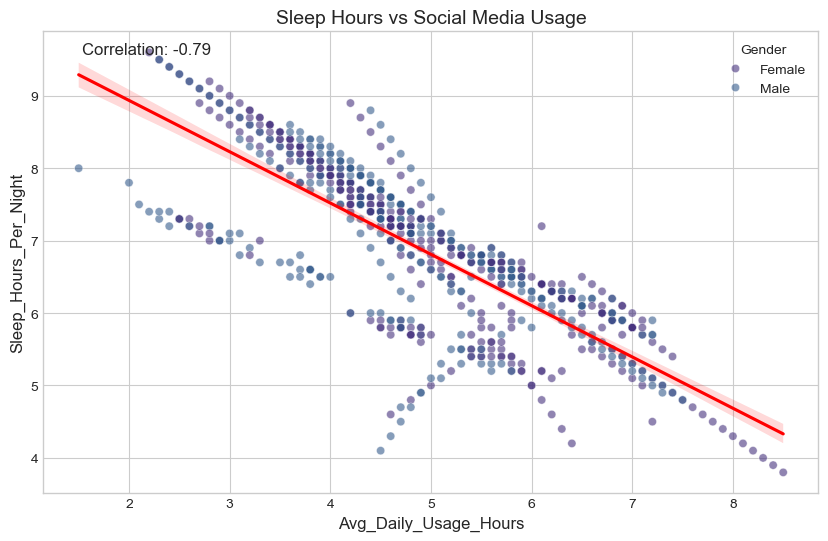

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df1, alpha=0.6, hue='Gender')
plt.title('Sleep Hours vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df1, scatter=False, color='red')

# Calculate correlation
correlation = df1['Avg_Daily_Usage_Hours'].corr(df1['Sleep_Hours_Per_Night'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

### Addiction Score by Sleep Category-

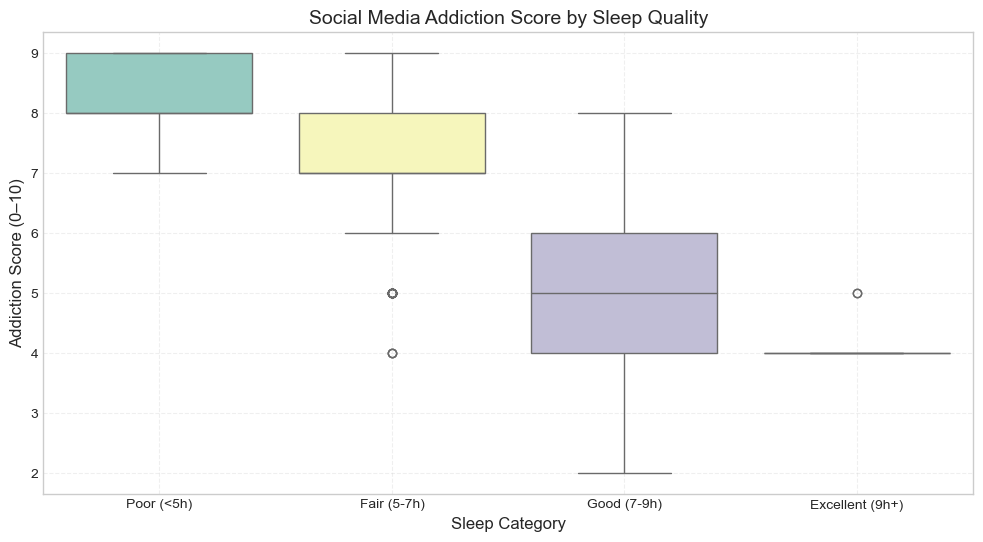

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Sleep_Category',
    y='Addicted_Score',
    data=df1,
    palette='Set3'  
)

plt.title('Social Media Addiction Score by Sleep Quality', fontsize=14)
plt.xlabel('Sleep Category', fontsize=12)
plt.ylabel('Addiction Score (0–10)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [61]:
from scipy.stats import linregress

# Run linear regression
slope, intercept, r_value, p_value, std_err = linregress(df1['Avg_Daily_Usage_Hours'], df1['Sleep_Hours_Per_Night'])

# Print the result
print(f"For every extra hour on social media, sleep decreases by about {abs(slope):.2f} hours.")


For every extra hour on social media, sleep decreases by about 0.71 hours.


<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: purple">
  <li><b><u> 5. Relationship Status and Conflicts Analysis :</u></b></li>
</ul>

### Relationship Status vs Social Media Usage-

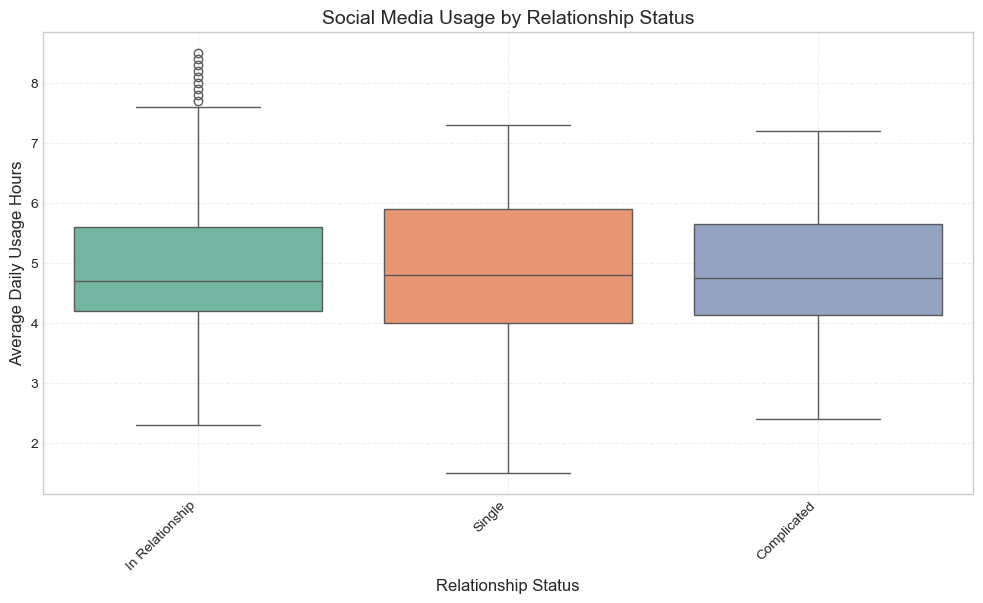

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Relationship_Status',
    y='Avg_Daily_Usage_Hours',
    data=df1,
    palette='Set2'
)

plt.title('Social Media Usage by Relationship Status', fontsize=14)
plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Average Daily Usage Hours', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Conflicts Over Social Media by Relationship Status-

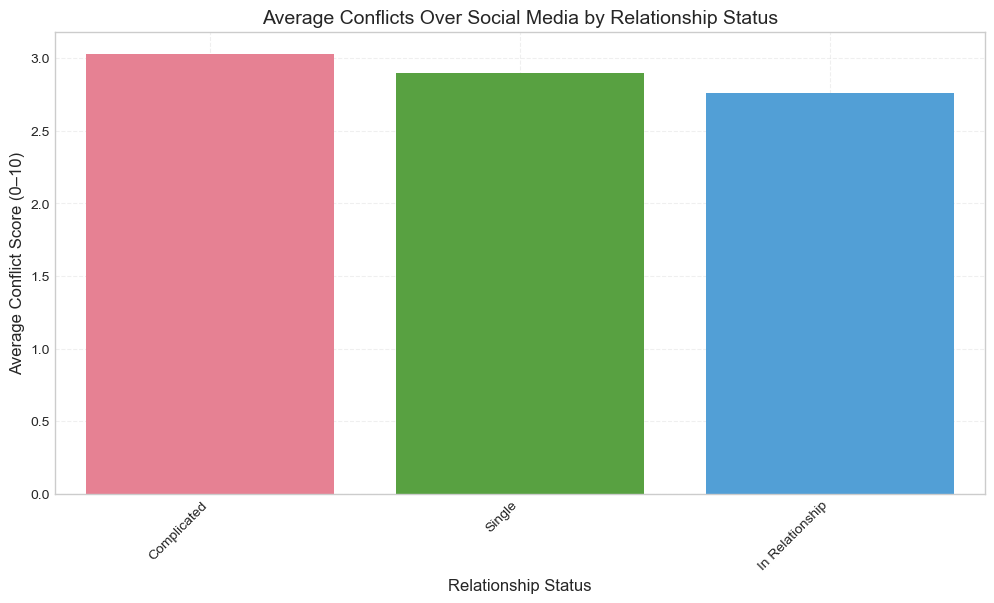

In [52]:
relationship_conflicts = df1.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=relationship_conflicts.index,
    y=relationship_conflicts.values,
    palette=sns.color_palette('husl', n_colors=len(relationship_conflicts))
)

plt.title('Average Conflicts Over Social Media by Relationship Status', fontsize=14)
plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Average Conflict Score (0–10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Social Media Addiction vs Relationship Conflicts-

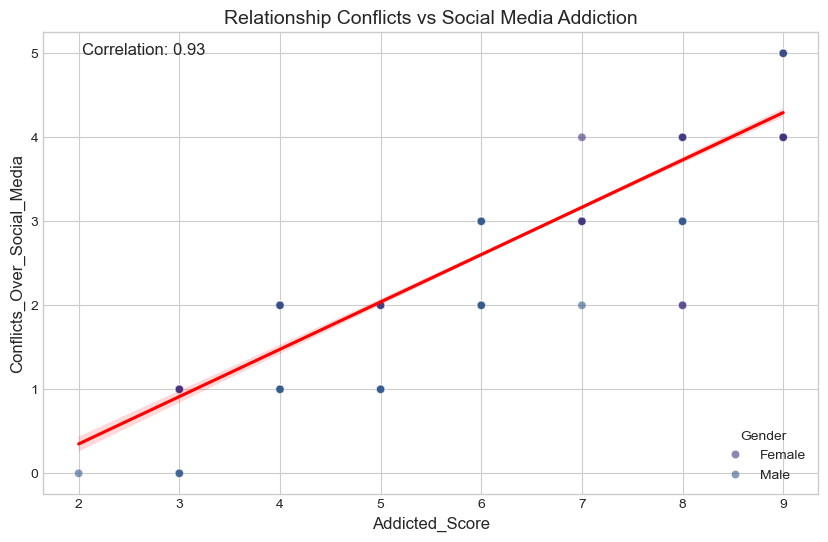

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Addicted_Score', y='Conflicts_Over_Social_Media', data=df1, alpha=0.6, hue='Gender')
plt.title('Relationship Conflicts vs Social Media Addiction', fontsize=14)
plt.xlabel('Addiction Score (0-10)', fontsize=12)
plt.ylabel('Conflicts Over Social Media (0-10)', fontsize=12)

# Add regression line
sns.regplot(x='Addicted_Score', y='Conflicts_Over_Social_Media', data=df1, scatter=False, color='red')

# Calculate correlation
correlation = df1['Addicted_Score'].corr(df1['Conflicts_Over_Social_Media'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: purple">
  <li><b><u> 6. Interactive Visualizations with Plotly :</u></b></li>
</ul>

### Interactive Scatter Plot: Usage Hours vs Mental Health vs Sleep Hours-

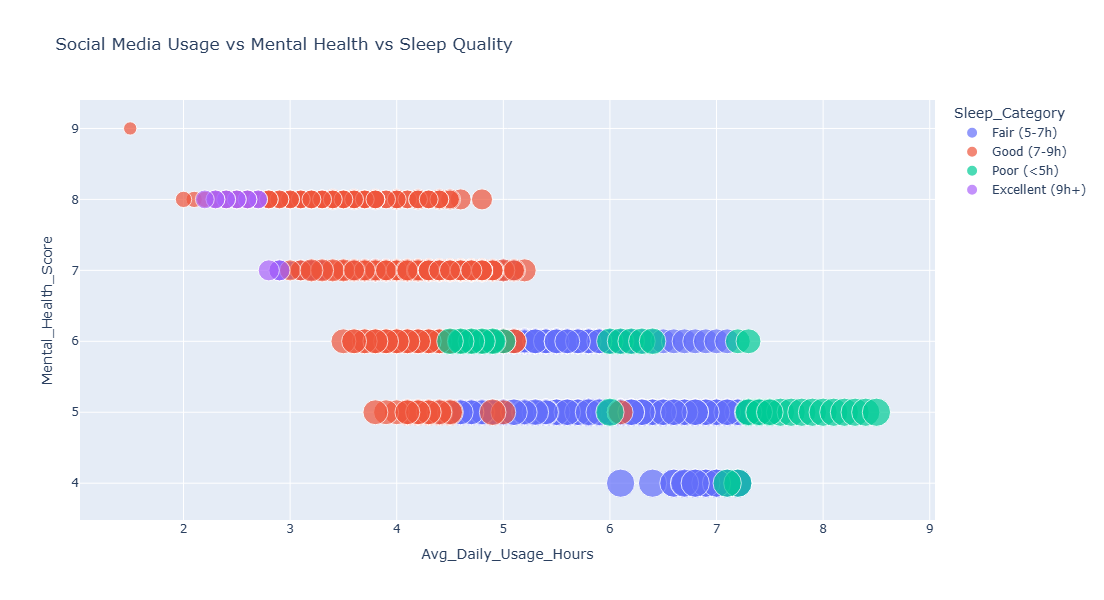

In [54]:
fig = px.scatter(df1, x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', color='Sleep_Category',
                 size='Addicted_Score', hover_name='Country', 
                 hover_data=['Age', 'Gender', 'Academic_Level', 'Most_Used_Platform'],
                 title='Social Media Usage vs Mental Health vs Sleep Quality')
fig.update_layout(width=900, height=600)
fig.show()

### Interactive Bar Chart: Platform Popularity by Age Group-

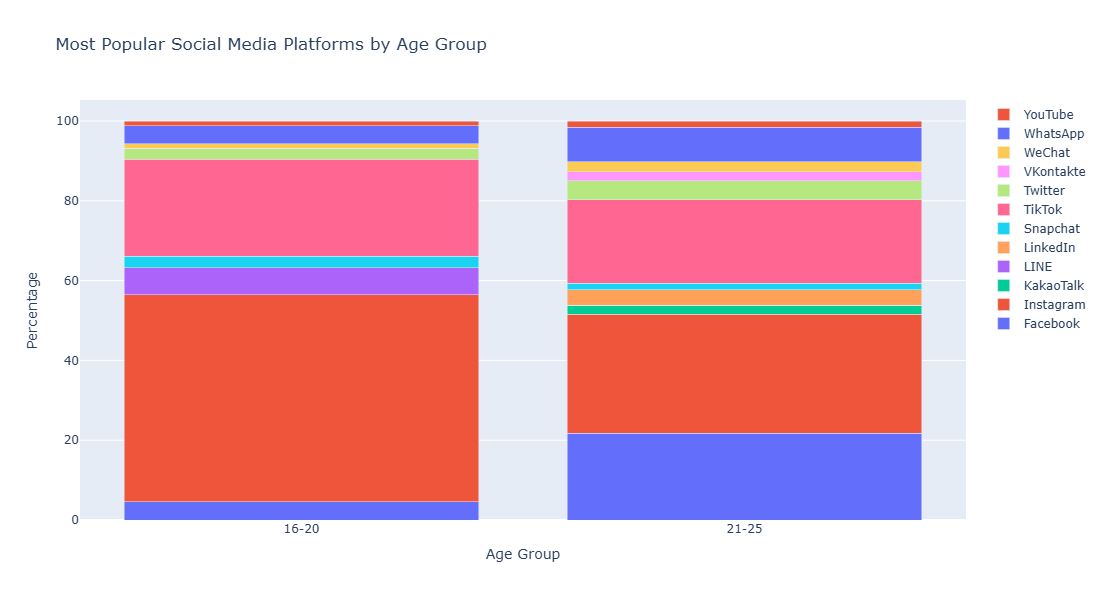

In [55]:
platform_by_age = pd.crosstab(df1['Age_Group'], df1['Most_Used_Platform'])
platform_by_age_percentage = platform_by_age.div(platform_by_age.sum(axis=1), axis=0) * 100

fig = go.Figure()
for platform in platform_by_age_percentage.columns:
    fig.add_trace(go.Bar(
        x=platform_by_age_percentage.index,
        y=platform_by_age_percentage[platform],
        name=platform
    ))

fig.update_layout(
    title='Most Popular Social Media Platforms by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Percentage',
    barmode='stack',
    width=900, 
    height=600
)
fig.show()

### Interactive Heatmap: Correlation Matrix-

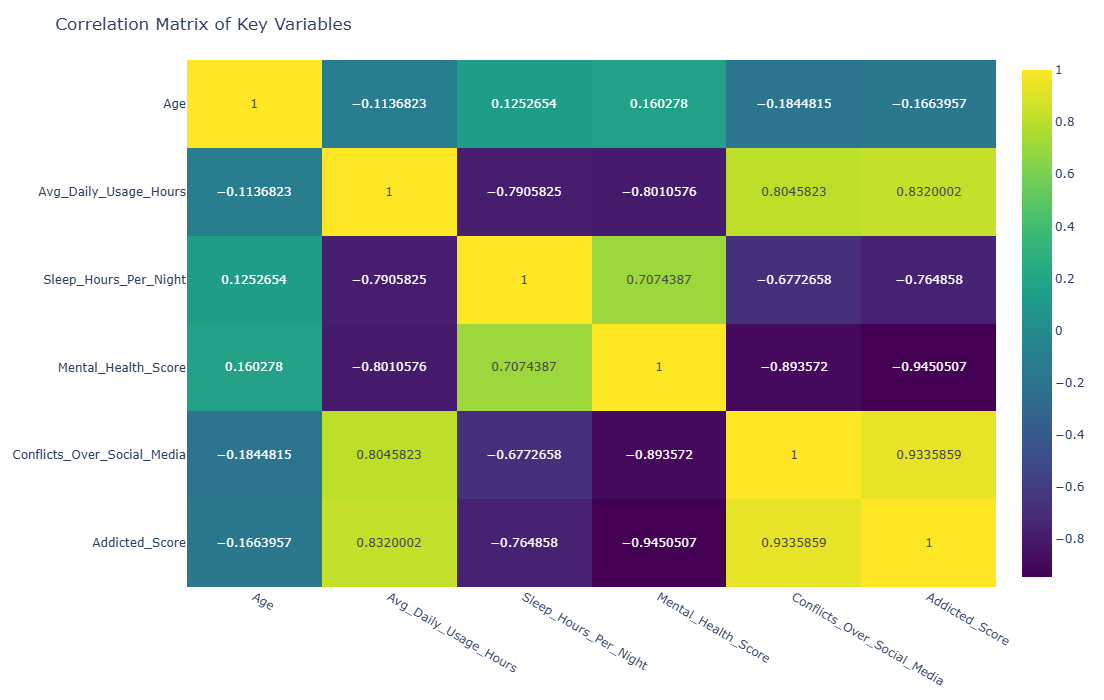

In [56]:
corr_matrix = df1[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']].corr()

fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='viridis')
fig.update_layout(
    title='Correlation Matrix of Key Variables',
    width=800,
    height=700
)
fig.show()

<div style="
    font-family: cerilleta;
    font-size: 35px;
    font-weight: bold;
    font-style: italic;
    color: green;
    text-align: center;
    padding: 20px;
    border-radius: 10px;
">
    Key Insights from the Analysis:
</div>

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 1) Usage Patterns and Demographics :</u></b></li>
</ul>

* Average daily social media usage among students is <b>4.92 hours</b>
* The most popular platforms are <b>Instagram, Tiktok, Facebook</b>
* Usage patterns differ significantly by age group and gender

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 2) Academic Impact :</u></b></li>
</ul>

* Students with higher social media usage report more negative academic effects
* <b>64.26%</b> of students believe social media negatively impacts their academic performance
* [High School Level] students show the highest addiction scores

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 3) Mental Health and Sleep :</u></b></li>
</ul>

* There is a moderate negative correlation between social media usage and mental health scores
* Students with poor sleep quality (<5 hours) have significantly higher addiction scores
* For every additional hour of social media use, sleep decreases by approximately <b>0.71 hours</b>

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 4) Relationship Impacts :</u></b></li>
</ul>

* Students in [Complicated Status] report the highest number of conflicts over social media
* Higher addiction scores strongly correlate with more relationship conflicts
* Whatspp usage is most associated with relationship conflicts

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u>5) Cross-Country Comparison :</u></b></li>
</ul>

* Students from India show the highest average addiction scores
* Cultural differences appear in platform preferences: [Whatspp]
* Academic impact perception varies significantly by country

<div style="
    font-family: cerilleta;
    font-size: 35px;
    font-weight: bold;
    font-style: italic;
    color: green;
    text-align: center;
    padding: 20px;
    border-radius: 10px;
">
   Recommendations Based on Analysis:
</div>

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 1) For Students :</u></b></li>
</ul>

* Set daily usage limits and use app blockers during study periods
* Prioritize sleep hygiene by avoiding social media before bedtime
* Be mindful of the impact on relationships and academic performance

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 2) For Educational Institutions :</u></b></li>
</ul>

* Develop awareness programs about social media addiction
* Provide resources for students struggling with balancing social media use
* Consider social media literacy courses in curriculum

<ul style="list-style-type: '➤ '; font-family: 'BRILLYO'; font-size: 20px; color: pink">
  <li><b><u> 3) For Research :</u></b></li>
</ul>

* Further investigate causality between social media usage and mental health
* Explore effective intervention strategies for addictive students
* Examine long-term impacts of social media addiction on career outcomes